In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
cc=pd.read_csv("BankChurners.csv")
cc.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"], axis=1, inplace=True)
cc.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1, inplace=True)
cc.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [60]:
cc.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [61]:
cc.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


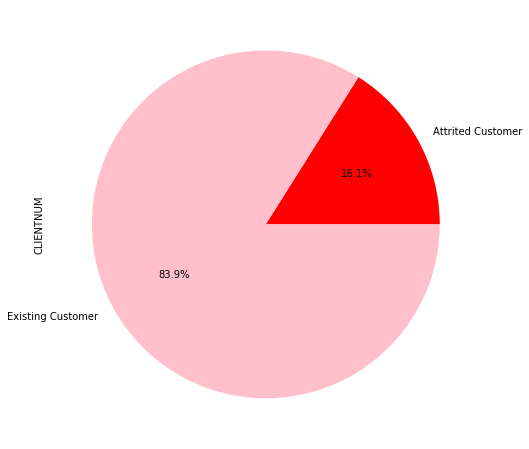

In [49]:
plt.figure(figsize=(8,8))

cc.groupby(["Attrition_Flag"])["CLIENTNUM"].count().plot.pie(autopct="%.1f%%", colors=["red", "pink"])

Text(0.5, 1.0, 'Attrition Flag by Income')

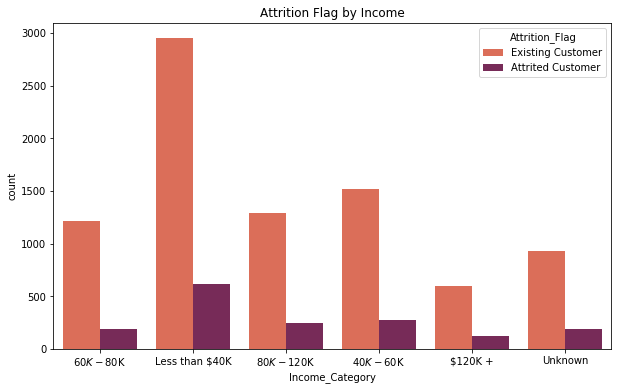

In [97]:
plt.figure(figsize=(10,6))
g=sns.countplot(x="Income_Category", data=cc, hue="Attrition_Flag", palette="rocket_r")
g.set_title("Attrition Flag by Income")

Text(0.5, 1.0, 'Months on book histogram')

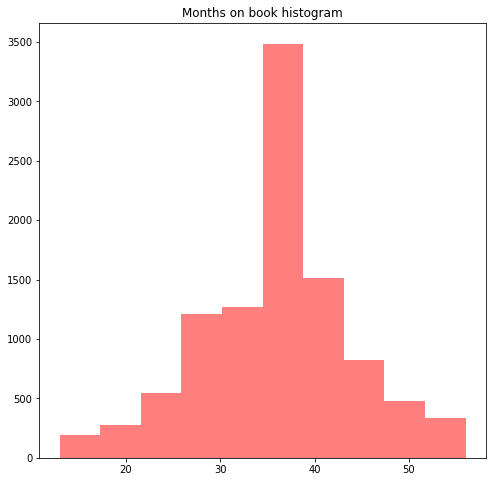

In [75]:
plt.figure(figsize=(8,8))
plt.hist(x="Months_on_book", data=cc, color="r", alpha=0.5 );
plt.title("Months on book histogram")

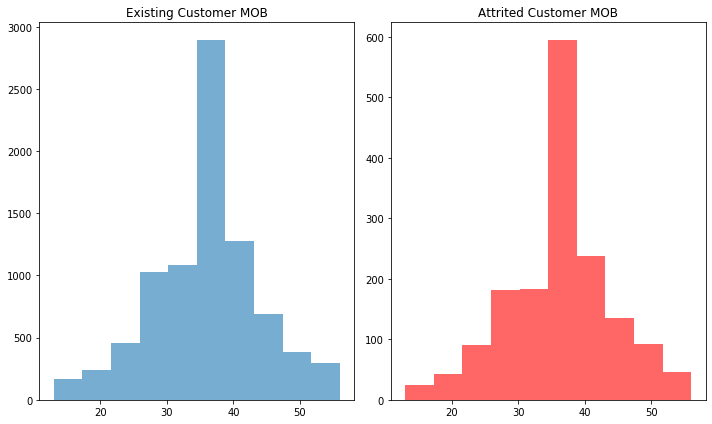

In [136]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
g=cc[cc["Attrition_Flag"]=="Existing Customer"]
plt.hist(g["Months_on_book"],alpha=0.6);
plt.title("Existing Customer MOB")

plt.subplot(1,2,2)
a=cc[cc["Attrition_Flag"]=="Attrited Customer"]
plt.hist(a["Months_on_book"], color="red", alpha=0.6);
plt.title("Attrited Customer MOB")

plt.tight_layout()

Text(0.5, 1.0, 'Attrition Flag by Marital Status')

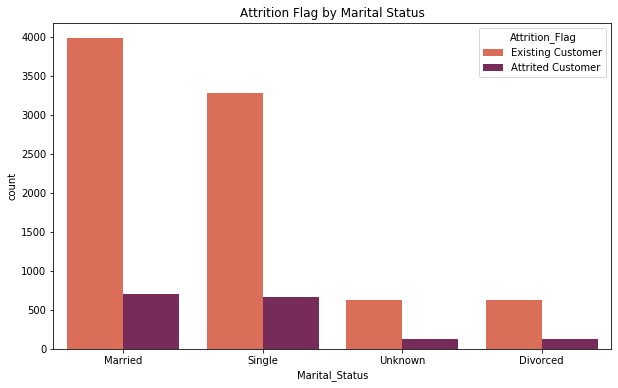

In [98]:
plt.figure(figsize=(10,6))
g=sns.countplot(x="Marital_Status", data=cc, hue="Attrition_Flag", palette="rocket_r", )
g.set_title("Attrition Flag by Marital Status")

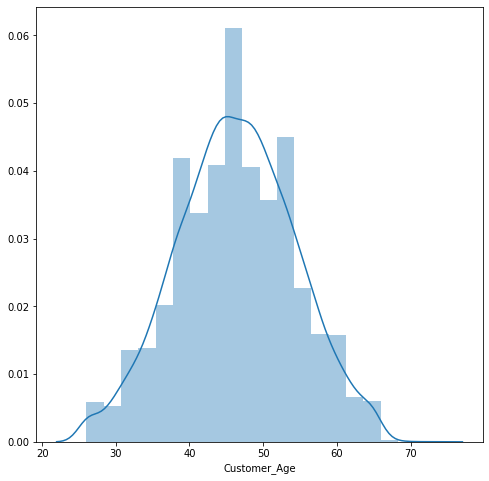

In [95]:
plt.figure(figsize=(8,8))
sns.distplot(cc["Customer_Age"], bins=20 )

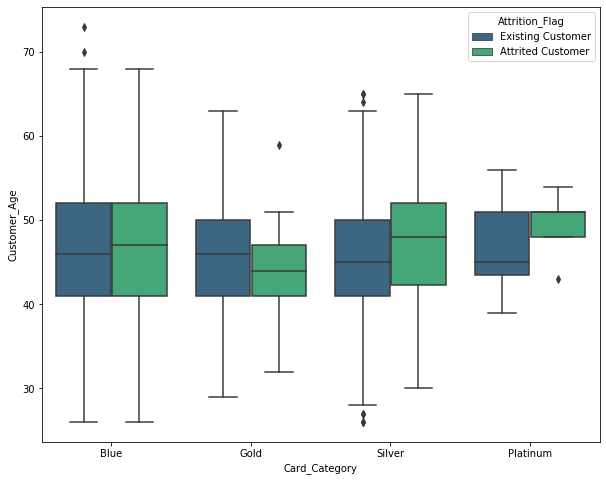

In [100]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Card_Category", y="Customer_Age", data=cc, hue="Attrition_Flag", palette="viridis")

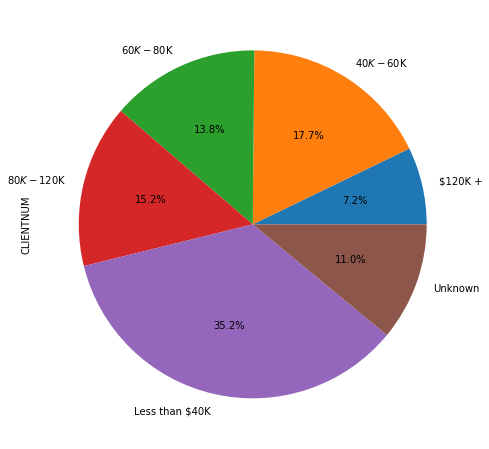

In [59]:
plt.figure(figsize=(8,8))
cc.groupby(["Income_Category"])["CLIENTNUM"].count().plot.pie(autopct="%.1f%%")

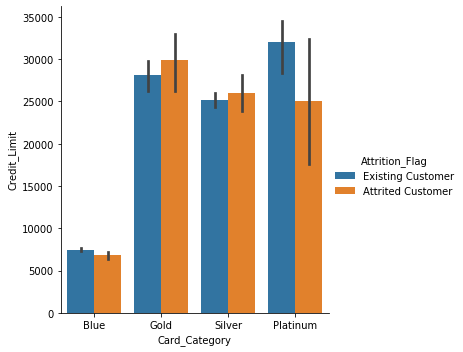

In [109]:
sns.catplot(x="Card_Category", y="Credit_Limit", data=cc, hue="Attrition_Flag", kind="bar")

In [83]:
cc.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Text(0.5, 1.0, 'Attrition Flag by Gender')

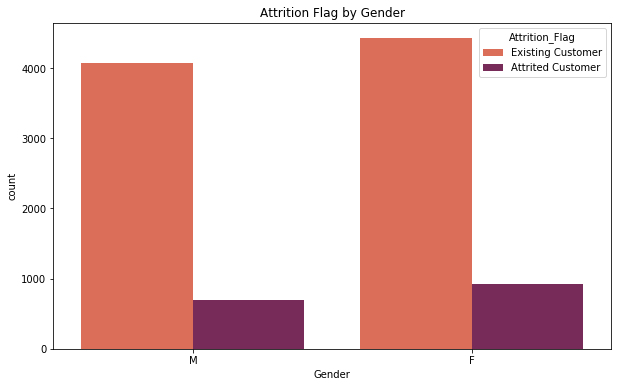

In [91]:
plt.figure(figsize=(10,6))
g=sns.countplot(x="Gender", data=cc, hue="Attrition_Flag", palette="rocket_r")
g.set_title("Attrition Flag by Gender")


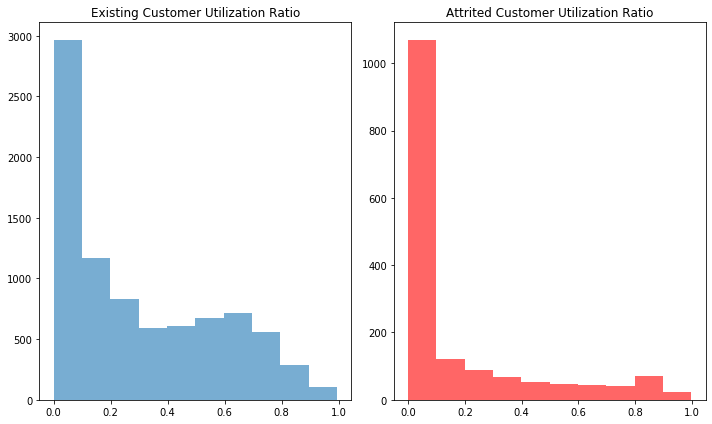

In [132]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
g=cc[cc["Attrition_Flag"]=="Existing Customer"]
plt.hist(g["Avg_Utilization_Ratio"],alpha=0.6);
plt.title("Existing Customer Utilization Ratio")

plt.subplot(1,2,2)
a=cc[cc["Attrition_Flag"]=="Attrited Customer"]
plt.hist(a["Avg_Utilization_Ratio"], color="red", alpha=0.6);
plt.title("Attrited Customer Utilization Ratio")

plt.tight_layout()

## Data Cleaning

In [137]:
flag=pd.get_dummies(cc["Attrition_Flag"], drop_first=True)
sex=pd.get_dummies(cc["Gender"], drop_first=True)
education=pd.get_dummies(cc["Education_Level"], drop_first=True)
married=pd.get_dummies(cc["Marital_Status"], drop_first=True)
married.rename(columns={"Unknown": "Unknown marital status"}, inplace=True)
cards=pd.get_dummies(cc["Card_Category"], drop_first=True)
income=pd.get_dummies(cc["Income_Category"], drop_first=True)
income.rename(columns={"Unknown": "Unknown income"}, inplace=True)

cc.drop(["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Card_Category", "Income_Category" ], axis=1,
       inplace=True)

cc=pd.concat([cc, flag, sex, education, married, cards, income] , axis=1)
cc.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Single,Unknown marital status,Gold,Platinum,Silver,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown income
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,0,0,0,1,0,0,0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,0,0,0,1,0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,0,0,0,1,0,0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,0,1,0,0,0,0,0,0,1,0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,0,0,0,1,0,0,0


In [142]:
cc.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Existing Customer', 'M', 'Doctorate', 'Graduate', 'High School',
       'Post-Graduate', 'Uneducated', 'Unknown', 'Married', 'Single',
       'Unknown marital status', 'Gold', 'Platinum', 'Silver', '$40K - $60K',
       '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown income'],
      dtype='object')

## Using Logistic Regression

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [171]:
X=cc.drop(["Existing Customer", "CLIENTNUM"], axis=1)
Y=cc["Existing Customer"]
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
df_feat = pd.DataFrame(scaled_features,columns=X.columns)


X_train, X_test, y_train, y_test= train_test_split(df_feat, Y, test_size=0.3, random_state=101)
model=LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [187]:
a=pd.DataFrame(model.coef_).T
b=pd.DataFrame(df_feat.columns)
model_coef=pd.concat([a,b], axis=1)
model_coef.columns=(["Coefficients", "Variables"])
model_coef

,Coefficients,Variables
0,0.025201,Customer_Age
1,-0.159749,Dependent_count
2,0.068666,Months_on_book
3,0.627322,Total_Relationship_Count
4,-0.489796,Months_Inactive_12_mon
5,-0.574955,Contacts_Count_12_mon
6,0.104765,Credit_Limit
7,0.754958,Total_Revolving_Bal
8,0.037060,Avg_Open_To_Buy
9,0.090507,Total_Amt_Chng_Q4_Q1


In [194]:
predictions_lr= model.predict(X_test)
print(confusion_matrix(y_test, predictions_lr, normalize="true"))
print("\n")
print(classification_report(y_test, predictions_lr))

[[0.58565737 0.41434263]
 [0.03153331 0.96846669]]


              precision    recall  f1-score   support

           0       0.79      0.59      0.67       502
           1       0.92      0.97      0.94      2537

    accuracy                           0.91      3039
   macro avg       0.85      0.78      0.81      3039
weighted avg       0.90      0.91      0.90      3039



In [223]:
pr=pd.DataFrame(predictions_lr)
y_t=pd.DataFrame(y_test).reset_index()
                                        
a=pd.concat([pr, y_t], axis=1)
a.drop("index", inplace=True, axis=1)
a.columns=(["predictions", "True Values"])

## SVM

In [227]:
from sklearn.svm import SVC

model_svm=SVC()
model_svm.fit(X_train, y_train)
svm_predictions=model_svm.predict(X_test)
print(confusion_matrix(y_test, svm_predictions, normalize="true"))
print("\n")
print(classification_report(y_test, svm_predictions))

[[0.59760956 0.40239044]
 [0.01616082 0.98383918]]


              precision    recall  f1-score   support

           0       0.88      0.60      0.71       502
           1       0.93      0.98      0.95      2537

    accuracy                           0.92      3039
   macro avg       0.90      0.79      0.83      3039
weighted avg       0.92      0.92      0.91      3039



## Catboost

In [230]:
from catboost import CatBoostClassifier

In [232]:
model=CatBoostClassifier(verbose=False )
model.fit(X_train, y_train)
cat_predictions=model.predict(X_test)

print(confusion_matrix(y_test, cat_predictions, normalize="true"))
print("\n")
print(classification_report(y_test, cat_predictions))


[[0.89043825 0.10956175]
 [0.00827749 0.99172251]]


              precision    recall  f1-score   support

           0       0.96      0.89      0.92       502
           1       0.98      0.99      0.99      2537

    accuracy                           0.97      3039
   macro avg       0.97      0.94      0.95      3039
weighted avg       0.97      0.97      0.97      3039



In [239]:
model.get_feature_importance()

array([2.81406638e+00, 3.41282220e-01, 1.45915294e+00, 4.68476878e+00,
       3.14510146e+00, 2.16781436e+00, 4.31892442e+00, 6.55570711e+00,
       1.52012343e+00, 7.32531719e+00, 2.73128768e+01, 2.92451951e+01,
       4.84148995e+00, 1.39364048e+00, 6.40649514e-01, 7.29427409e-02,
       1.55342527e-01, 4.22476931e-02, 1.29450527e-01, 1.36604677e-01,
       5.05481830e-02, 5.46514993e-01, 1.40358917e-01, 1.77452761e-01,
       2.68365672e-02, 2.43705010e-05, 6.71369486e-02, 9.00432446e-02,
       3.47192538e-01, 1.23589339e-01, 9.10484153e-02, 3.65553825e-02])

In [253]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

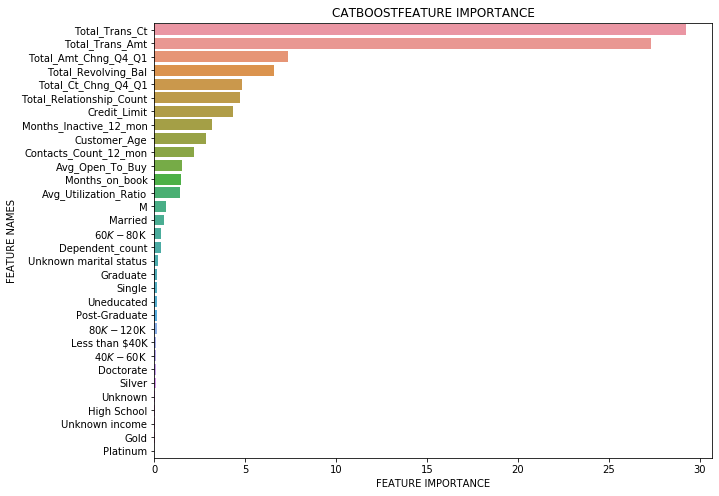

In [254]:
plot_feature_importance(model.get_feature_importance(),X_train.columns,'CATBOOST')


**As we can see from the confusion matrix and classification report Catboost has the best results amongst the three models we run.** 